# Minimizing a sum of absolute values

We use linear regression minimizing the absolute deviations. 

We follow closely this [paper](https://www.jstor.org/stable/1402501).

In [44]:
# Install Pyomo and solvers for Google Colab
import sys
if "google.colab" in sys.modules:
    !wget -N -q https://raw.githubusercontent.com/jckantor/MO-book/main/tools/install_on_colab.py 
    %run install_on_colab.py

# Generate data

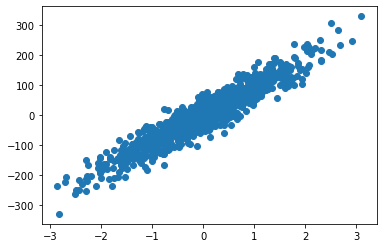

In [34]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

n_features = 1
n_samples = 1000
noise = 30

# generate regression dataset
np.random.seed(2020)
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)

if n_features == 1:
    plt.scatter(X, y)
    plt.show()

# Model



In [35]:
import pyomo.environ as pyo

In [36]:
m = pyo.ConcreteModel('min abs')

In [37]:
n, k = X.shape

In [38]:
m.I = pyo.RangeSet(0, n-1)
m.J = pyo.RangeSet(0, k-1)

In [39]:
m.ep = pyo.Var(m.I, domain=pyo.NonNegativeReals)
m.em = pyo.Var(m.I, domain=pyo.NonNegativeReals)
m.m = pyo.Var(m.J)
m.b = pyo.Var()

In [40]:
@m.Constraint(m.I)
def fit(m, i):
    return y[i] == m.b + m.ep[i] - m.em[i] + sum(X[i][j]*m.m[j] for j in m.J)

In [41]:
@m.Objective(sense=pyo.minimize)
def obj(m):
    return sum(m.ep[i] + m.em[i] for i in m.I)

In [42]:
%time pyo.SolverFactory('glpk').solve(m)

CPU times: user 79.6 ms, sys: 14 ms, total: 93.6 ms
Wall time: 199 ms


{'Problem': [{'Name': 'unknown', 'Lower bound': 23438.9432109967, 'Upper bound': 23438.9432109967, 'Number of objectives': 1, 'Number of constraints': 1001, 'Number of variables': 2003, 'Number of nonzeros': 4001, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.11536598205566406}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

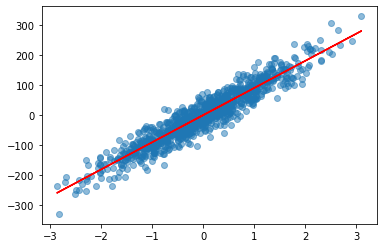

In [43]:
if n_features ==  1:
    plt.scatter(X, y, alpha=0.5)
    plt.plot([x[0] for x in X], [pyo.value(m.b) + pyo.value(m.m[0])*x[0] for x in X ], 'r')
    plt.show()
else:
    print( pyo.value(m.b),[pyo.value(m) for m in m.m.values() ] )